# [ASNARO-1 の光学画像を取得](https://www.tellusxdp.com/ja/howtouse/dev/20200220_000177.html)

In [1]:
import os
import json

fpth_secret = os.path.join(os.environ['HOME'], 'jupyter/secret.json')
with open(fpth_secret) as f:
    secret = json.load(f)
TOKEN = secret['tellus']
HEADERS = {
    'Authorization': 'Bearer ' + TOKEN
}

## API を用いて ASNARO-1 のシーンデータを取得する

In [2]:
import requests

def fetch_asnaro_scenes(world_pos):
    url = 'https://gisapi.tellusxdp.com'
    url += '/api/v1/asnaro1/scene'
    
    r = requests.get(url, params=world_pos, headers=HEADERS)
    
    return r.json()

In [3]:
pos = {
    'min_lat': 20.425278,
    'min_lon': 122.933611,
    'max_lat': 45.557222,
    'max_lon': 153.986389
}
scenes = fetch_asnaro_scenes(pos)
print(len(scenes))
print(scenes[-1])

277
{'acquisitionDate': 'Thu, 25 Dec 2014 13:20:31 GMT', 'clat': 37.6287834761219, 'clon': 127.1820608503, 'cloudCover': 0.0, 'entityId': '20181226061336632_AS1', 'max_lat': 37.6847826523561, 'max_lon': 127.258430582893, 'min_lat': 37.5727405488022, 'min_lon': 127.105581508595, 'path': 0, 'productId': '20181226061336632_AS1_D01_L1B', 'row': 0, 'thumbs_url': 'https://tile.tellusxdp.com/thums/ASNARO-1/20181226061336632_AS1.PNG'}


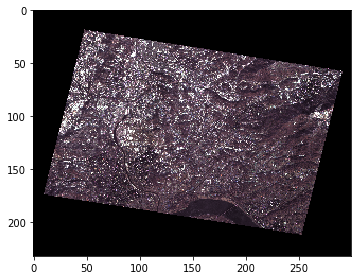

In [4]:
from skimage import io
%matplotlib inline

scene = scenes[-1]
thumbs_url = scene['thumbs_url']
img_thumbs = io.imread(thumbs_url)
io.imshow(img_thumbs)

## API を用いて ASNARO-1 の地図タイル画像を取得する

In [5]:
import math

def deg2num(lat_deg, lon_deg, zoom):
    # https://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Python
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    lat_rad = math.radians(lat_deg)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

print(deg2num(scene['clat'], scene['clon'], 13))

(6990, 3170)


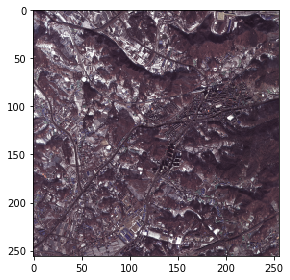

In [6]:
from io import BytesIO

def fetch_asnaro_image(sceneid, tile):
    url = 'https://gisapi.tellusxdp.com'
    url += '/ASNARO-1'
    
    lst = []
    lst.append(str(sceneid))
    lst.append(str(tile['zoom']))
    lst.append(str(tile['xtile']))
    lst.append(str(tile['ytile']))
    url += '/' + '/'.join(lst) + '.png'
    
    r = requests.get(url, headers=HEADERS)
    
    return io.imread(BytesIO(r.content))
    
tile = {
    'zoom': 13,
    'xtile': 6990,
    'ytile': 3170
}
img = fetch_asnaro_image(scene['entityId'], tile)
io.imshow(img)